In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import tensorflow as tf


In [3]:
print("--> Checking for physical Tensorflow devices")
for device in tf.config.list_physical_devices():
    print(": {}".format(device.name))

--> Checking for physical Tensorflow devices
: /physical_device:CPU:0
: /physical_device:GPU:0


In [4]:
!unzip -q /content/gdrive/MyDrive/CMPE255_ASL_PROJECT/Data.zip

In [5]:
dataset_path = '/content/asl_alphabet_train/asl_alphabet_train'


In [6]:
Efficientnet_b0 = 'https://tfhub.dev/google/efficientnet/b0/classification/1'


In [7]:
import os
import tensorflow_hub as hub
import tensorflow as tf
import pathlib
import cv2
from sklearn.utils import shuffle
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [8]:
train_data_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split = 0.2)

test_data_generator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2)

In [9]:
# GPU setup
batch_size = 32
img_height = 224
img_width = 224
train_data = train_data_generator.flow_from_directory(
    dataset_path,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

val_data = test_data_generator.flow_from_directory(
    dataset_path,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode='categorical',
    subset = 'validation')

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [10]:
Efficientnet_b0 = 'https://tfhub.dev/google/efficientnet/b0/classification/1'


In [11]:
model_Efficientnet = tf.keras.Sequential([
    hub.KerasLayer(Efficientnet_b0, trainable = False, input_shape = (224,224,3), name = 'Efficientnet_b0'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(29, activation = 'softmax', name = 'Output_layer')
])

model_Efficientnet.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [12]:
efficientnet_model = model_Efficientnet.fit(train_data, epochs = 10, verbose = 1, validation_data=val_data)


Epoch 1/10
2175/2175 [==============================] - 865s 393ms/step - loss: 0.6136 - accuracy: 0.8278 - val_loss: 0.4900 - val_accuracy: 0.8446
Epoch 2/10
2175/2175 [==============================] - 841s 387ms/step - loss: 0.2839 - accuracy: 0.9137 - val_loss: 0.5274 - val_accuracy: 0.8351
Epoch 3/10
2175/2175 [==============================] - 824s 379ms/step - loss: 0.2309 - accuracy: 0.9289 - val_loss: 0.4332 - val_accuracy: 0.8632
Epoch 4/10
2175/2175 [==============================] - 818s 376ms/step - loss: 0.2024 - accuracy: 0.9354 - val_loss: 0.4487 - val_accuracy: 0.8678
Epoch 5/10
2175/2175 [==============================] - 814s 374ms/step - loss: 0.1866 - accuracy: 0.9411 - val_loss: 0.4719 - val_accuracy: 0.8648
Epoch 6/10
2175/2175 [==============================] - 811s 373ms/step - loss: 0.1754 - accuracy: 0.9447 - val_loss: 0.4419 - val_accuracy: 0.8753
Epoch 7/10
2175/2175 [==============================] - 807s 371ms/step - loss: 0.1596 - accuracy: 0.9491 - val_

In [13]:
def plot_history(history, metric, val_metric):
  acc = history.history[metric]
  val_acc = history.history[val_metric]

  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs_range = range(len(acc))

  fig=plt.figure(figsize=(12, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylim([min(plt.ylim()),1])
  plt.grid(True)
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.grid(True)
  plt.title('Training and Validation Loss')
  plt.show()
  fig.savefig('traininghistory.pdf')



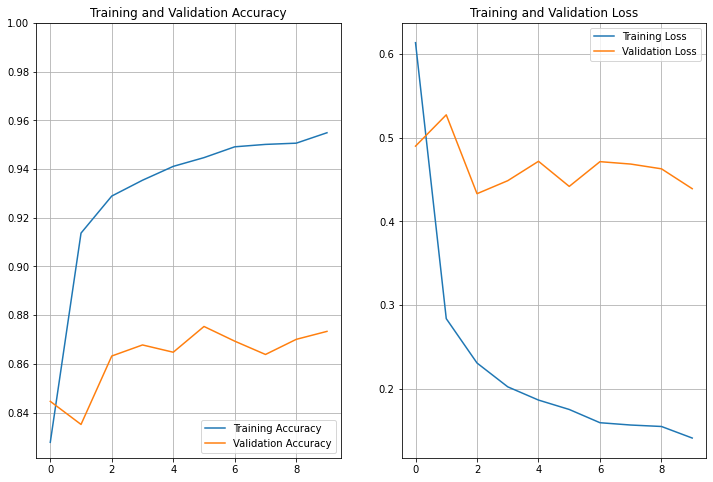

In [15]:
plot_history(efficientnet_model, 'accuracy', 'val_accuracy')

In [17]:
model_Efficientnet.save('/content/gdrive/MyDrive/CMPE255_ASL_PROJECT/Efficientnet_model.h5')

In [18]:
model_Efficientnet.